In [46]:
#  Import some data manipulation and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")
#!pip install -q keras

In [48]:


# Skip rows with errors
aquifer_auser = pd.read_csv('/content/Predictioneer_Dataset.csv')

# Display the first few rows of the DataFrame
aquifer_auser.head()

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,3/5/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/6/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/7/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/8/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/9/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
print('='*70)
print(' '*25,'AQUIFER_AUSER',' '*25)
print('\n')
#Print the number of rows and columns in a dataset
print('Number of records: {}    Number of features: {}'.format(aquifer_auser.shape[0],
                                                                aquifer_auser.shape[1]))
print('\n')

#Check for presence of missing values - NANs if any
print('Do missing values exist in any feature? :', aquifer_auser.isnull().values.any())
print('\n')

#Print all the unique datatypes in all columns in the dataset
print('Unique data types of features: \n\n',aquifer_auser.dtypes.unique())
print('\n')

#Print non-null count, dtypes with column name of each column
print('General information of complete dataset: \n\n')
aquifer_auser.info()
print('\n')

#Print stats like count, mean, standard dev etc of each column
print('Summary of statistics of the numerical value features: \n\n',aquifer_auser.describe().T)

                          AQUIFER_AUSER                          


Number of records: 4499    Number of features: 27


Do missing values exist in any feature? : True


Unique data types of features: 

 [dtype('O') dtype('float64')]


General information of complete dataset: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     4499 non-null   object 
 1   Rainfall_Gallicano                       1640 non-null   float64
 2   Rainfall_Pontetetto                      1640 non-null   float64
 3   Rainfall_Monte_Serra                     1640 non-null   float64
 4   Rainfall_Orentano                        1640 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 1640 non-null   float64
 6   Rainfall_Piaggione                       1275 non



                                                   AQUIFER_AUSER                                                   




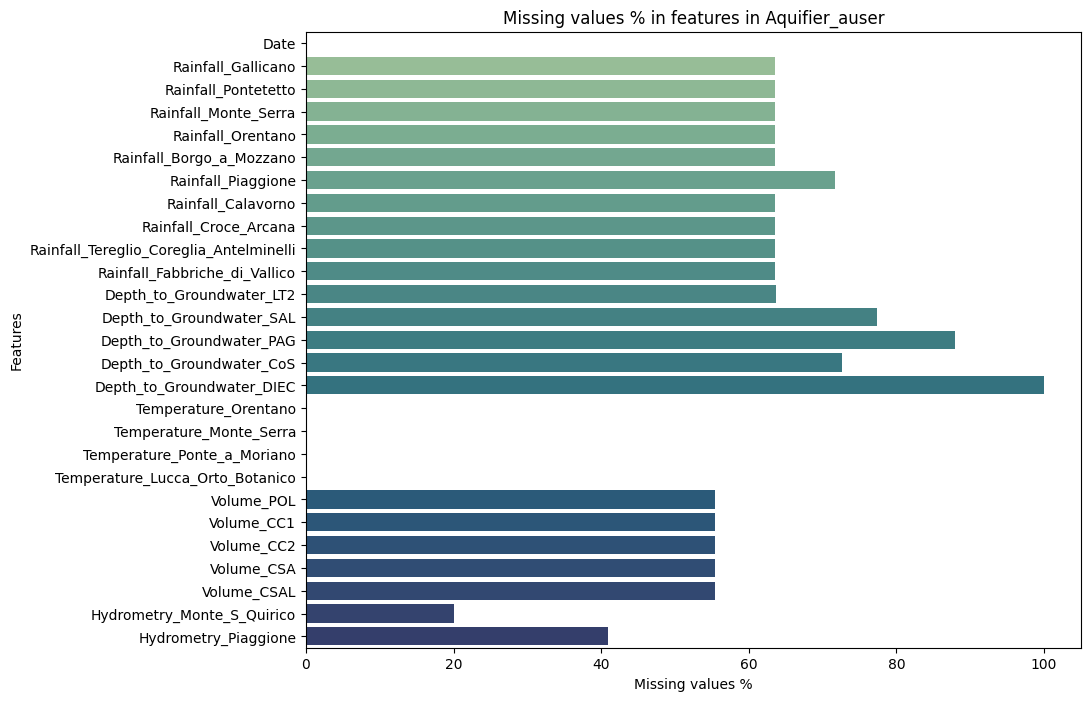

In [50]:
print('='*120)
print('\n')
print(' '*50,'AQUIFER_AUSER',' '*50)
print('\n')

#calculate the count and percentage of missing values in each column of the dataset
missing_count = aquifer_auser.isnull().sum()
missing_perc = (missing_count/len(aquifer_auser))*100

# create a dataframe with the missing count and missing percentage values
missing_df = pd.DataFrame(missing_count,missing_perc)

#if number of features is greater than 10 then we create a larger figure size for better visuals
if(len(aquifer_auser.columns)>10):
    plt.figure(figsize=(10,8))

# plot a barplot with missing values % and feature names
sns.barplot(y = missing_count.index, x = missing_perc.values,data = missing_df,
            palette="crest",orient='h')

#set the plot x label, y label and the figure's title
plt.title('Missing values % in features in Aquifier_auser')
plt.ylabel('Features')
plt.xlabel('Missing values %')
plt.show()



                                                   AQUIFER_AUSER                                                   




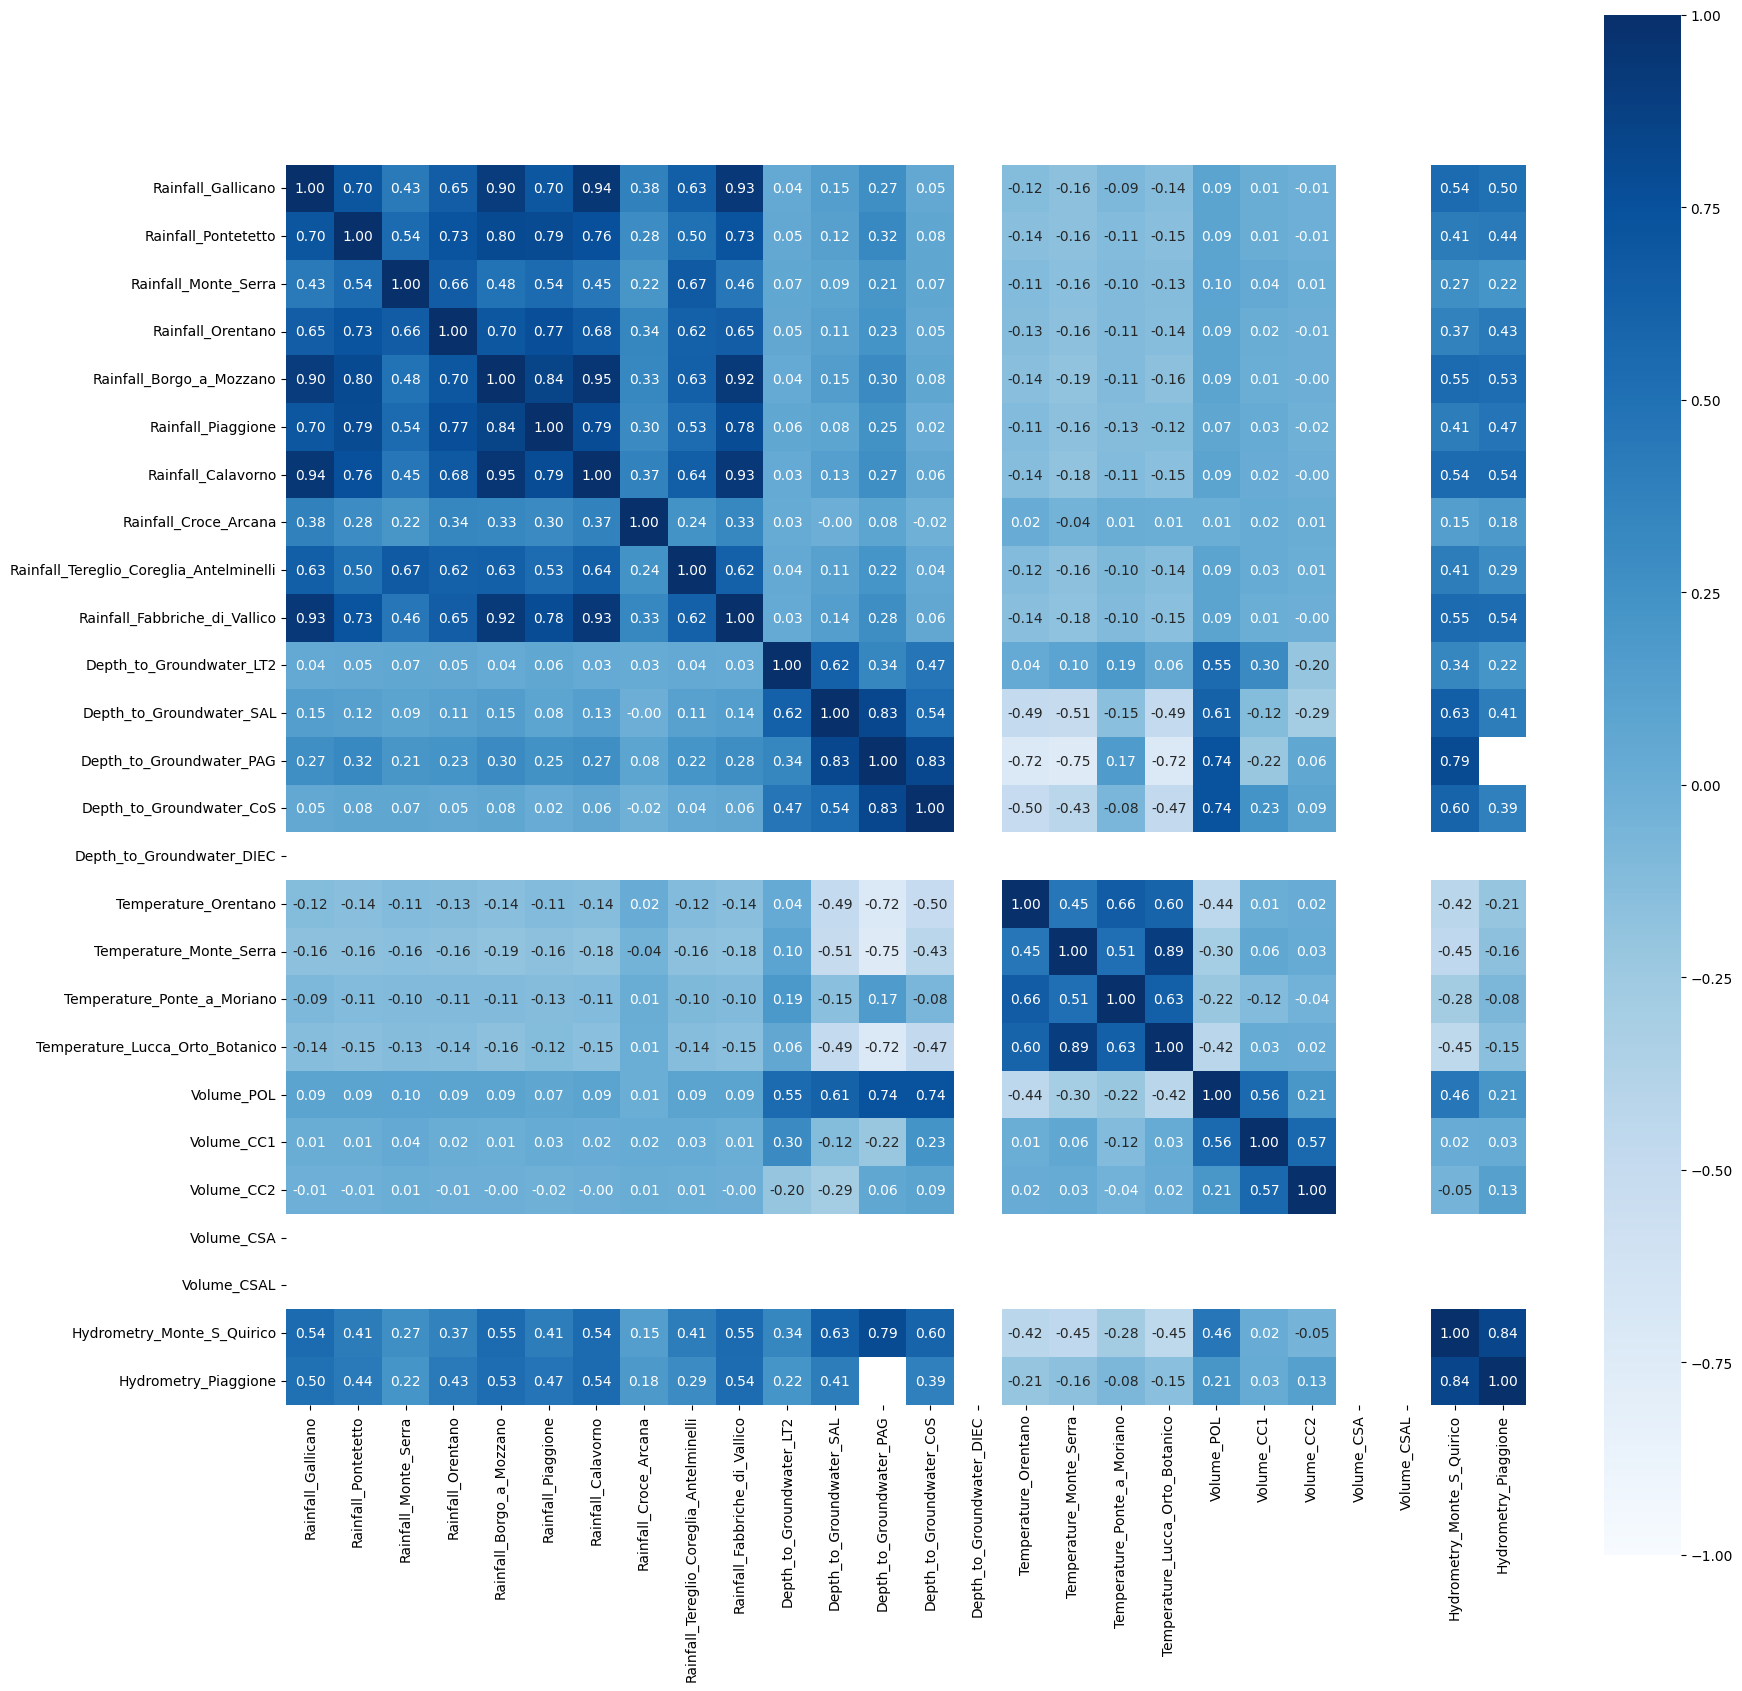

In [51]:
print('='*120)
print('\n')
print(' '*50,'AQUIFER_AUSER',' '*50)
print('\n')

#if number of features is greater than 10 then we create a larger figure size for better visuals
if(len(aquifer_auser.columns)>10):
    plt.figure(figsize=(20,20))


# plot heatmap to find correlation in the dataset features
sns.heatmap(aquifer_auser.corr(),annot=True, fmt='.2f',vmin=-1, vmax=1, center=0, cmap='Blues', square=True)
plt.show()



                                                   AQUIFER_AUSER                                                   




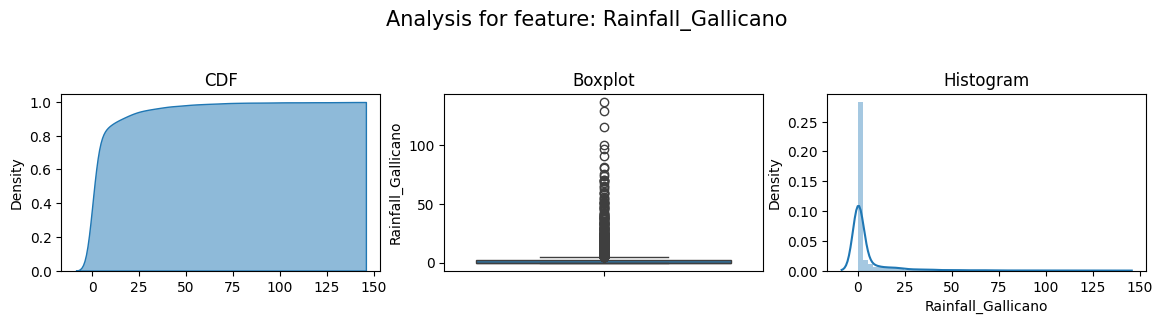

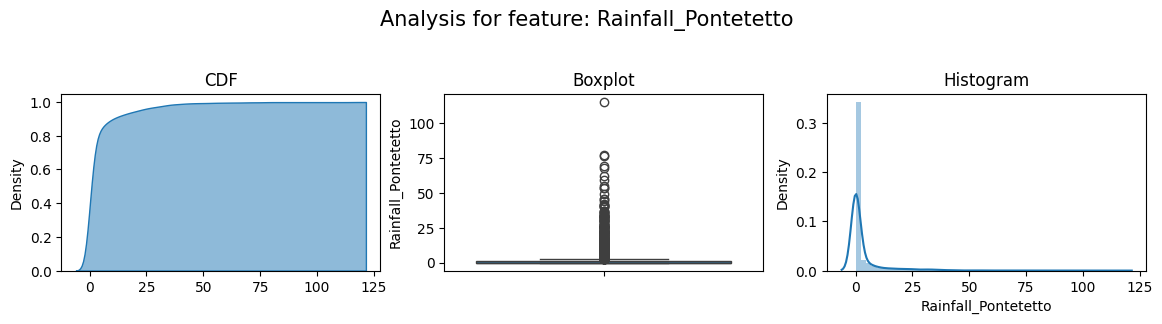

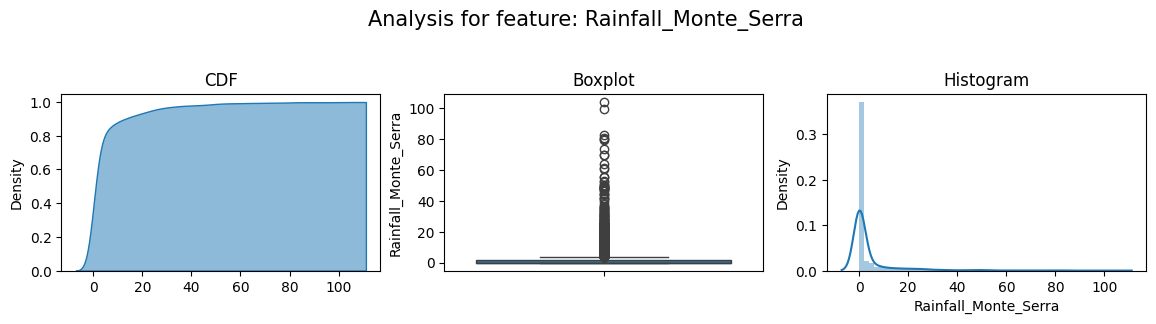

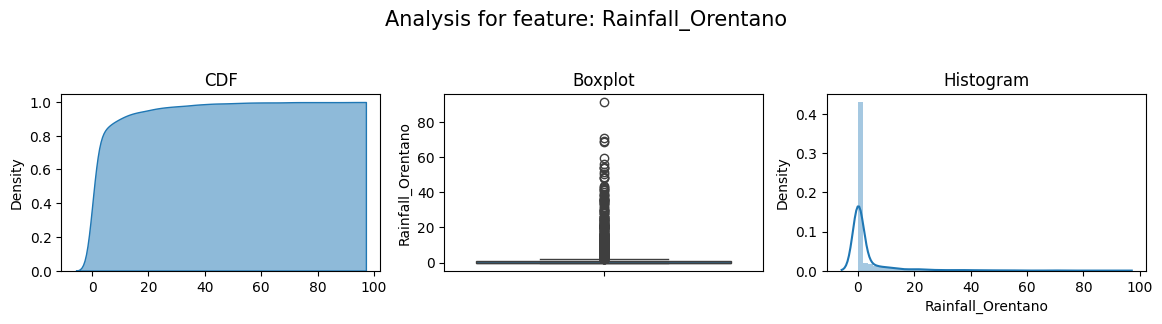

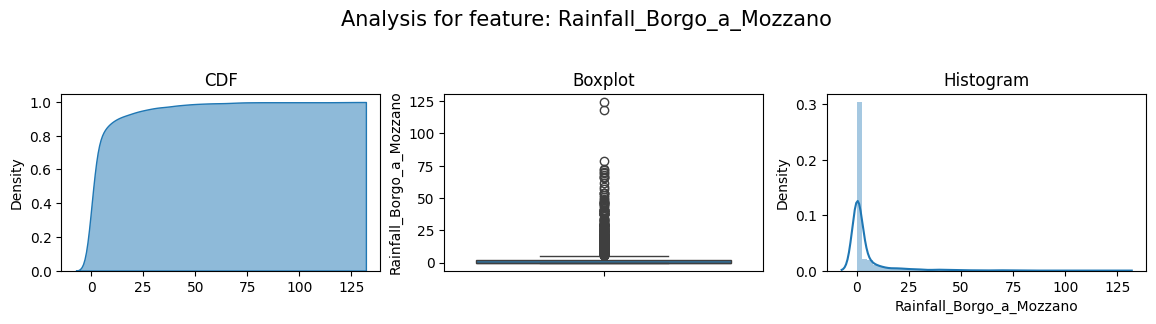

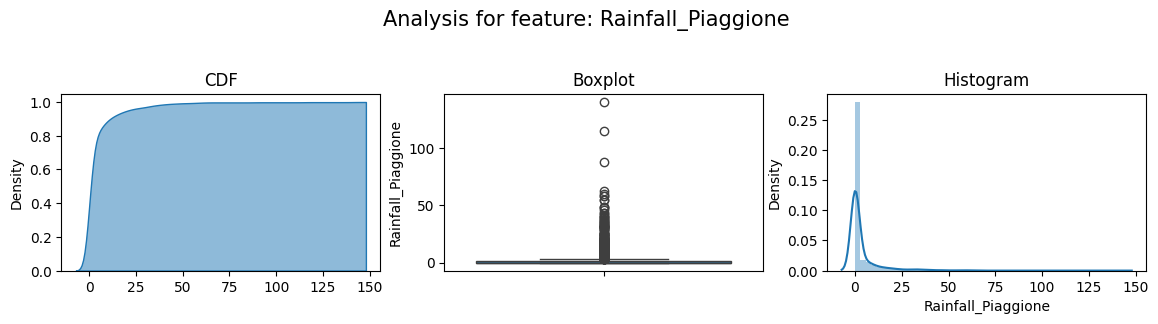

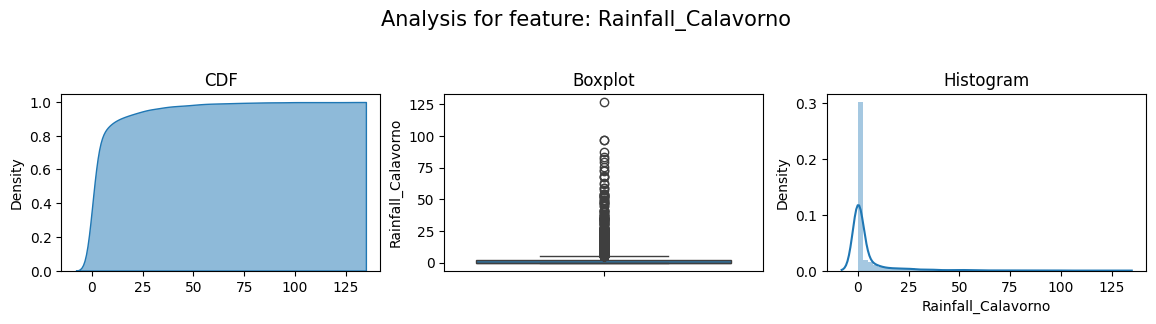

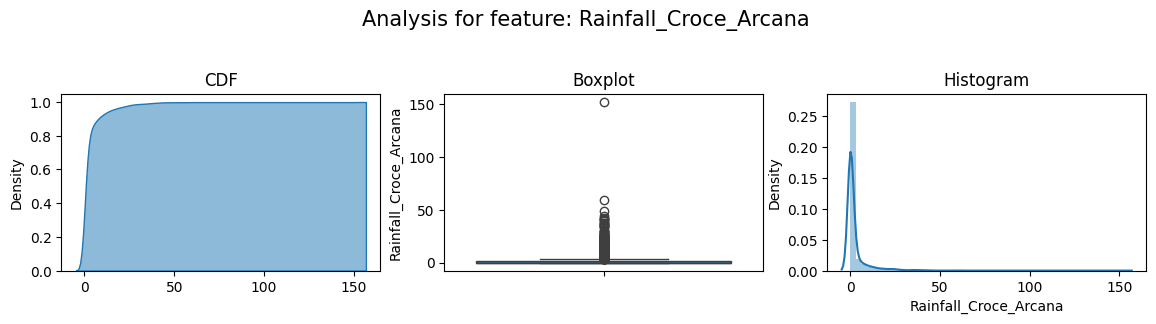

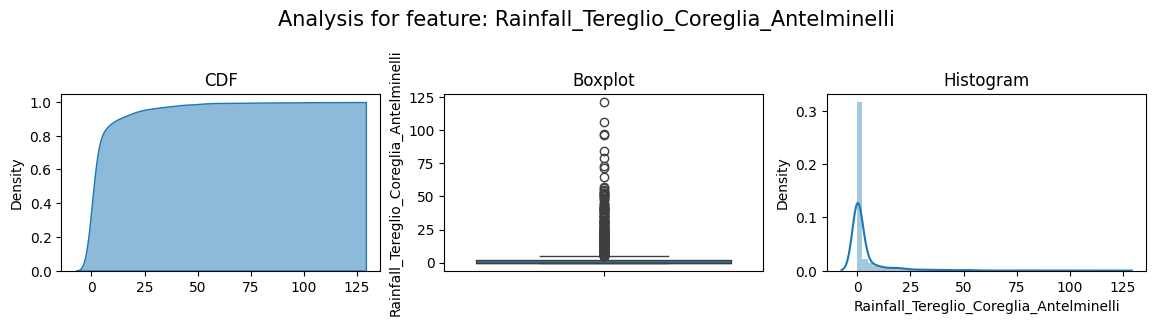

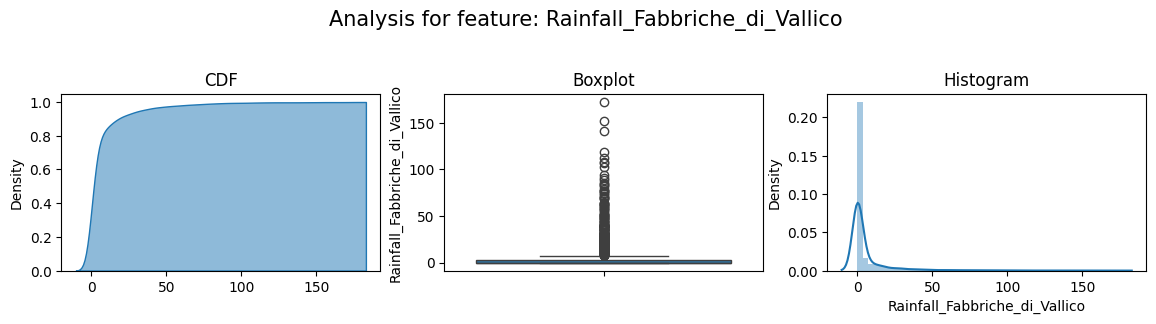

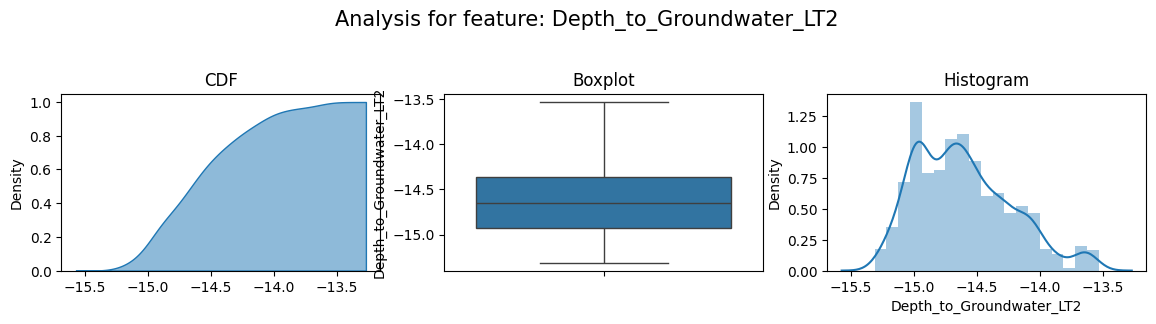

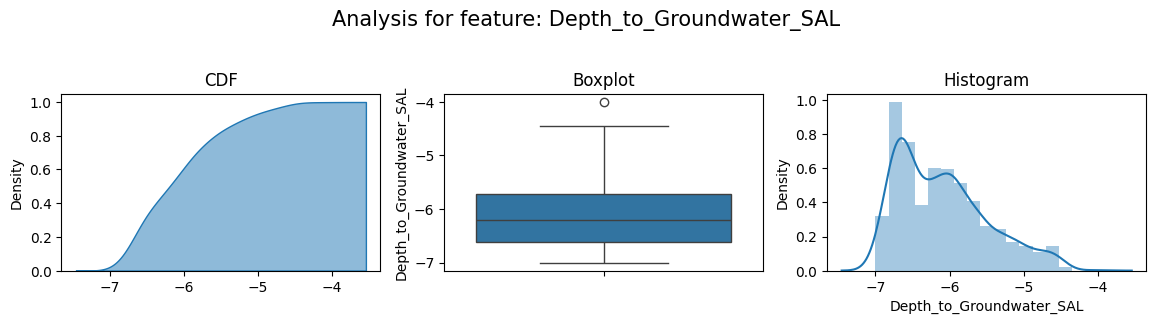

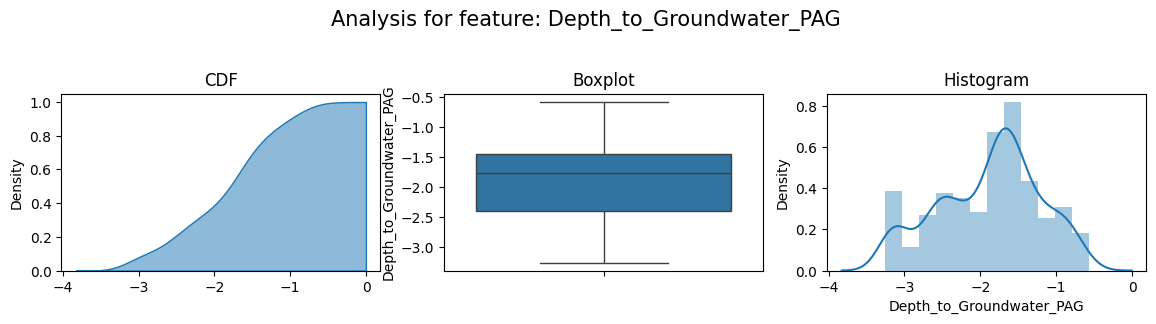

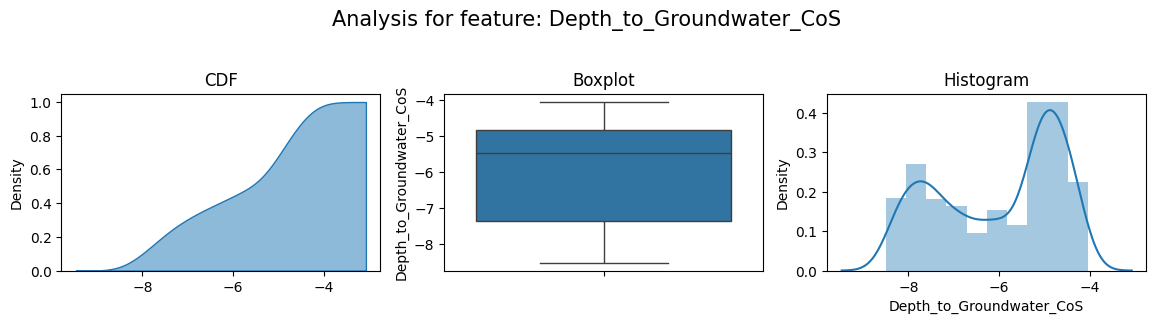

ValueError: List of boxplot statistics and `positions` values must have same the length

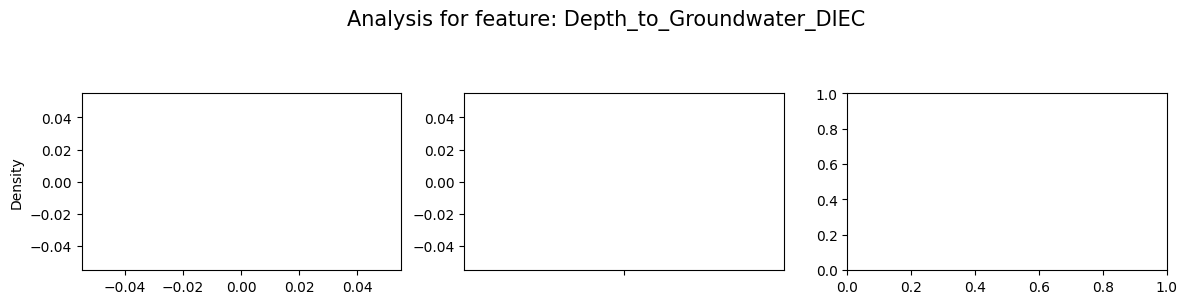

In [53]:
print('='*120)
print('\n')
print(' '*50,'AQUIFER_AUSER',' '*50)
print('\n')

#remove the date feature
dataset = aquifer_auser.drop(['Date'],axis=1)

#for all features, plot the cdf, boxplot, histogram
for col in dataset.columns:
    fig, axes = plt.subplots(1, 3, figsize = (14,3))
    fig.suptitle('Analysis for feature: '+col,fontsize=15)
    fig.subplots_adjust(top=0.7)
    sns.kdeplot(np.array(dataset[col]), cumulative= True, fill=True,palette="crest",alpha=.5, ax = axes[0])
    sns.boxplot(dataset[col], ax = axes[1])
    sns.distplot(dataset[col], ax = axes[2])

    #set titles for each plot
    axes[0].set_title('CDF')
    axes[1].set_title('Boxplot')
    axes[2].set_title('Histogram')
    plt.show()

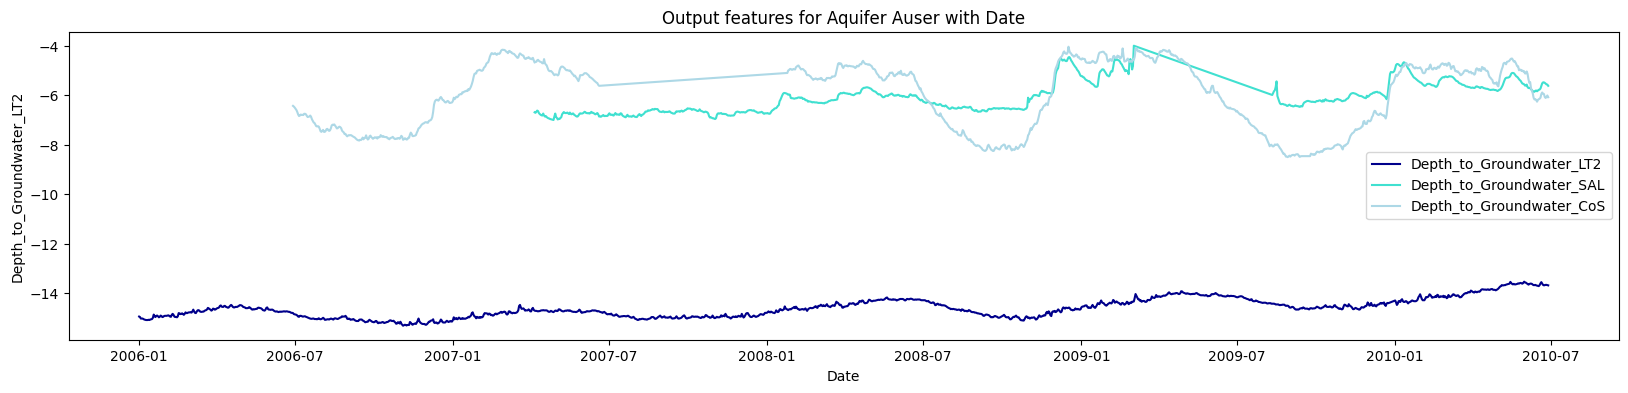

In [54]:
# Plot the depth to groundwater with date for Aquifer Auser
plt.figure(figsize=(20,4))
plt.title('Output features for Aquifer Auser with Date')
line_colors = ['darkblue','turquoise','lightblue']
for c,col in enumerate(['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL','Depth_to_Groundwater_CoS']):
    sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

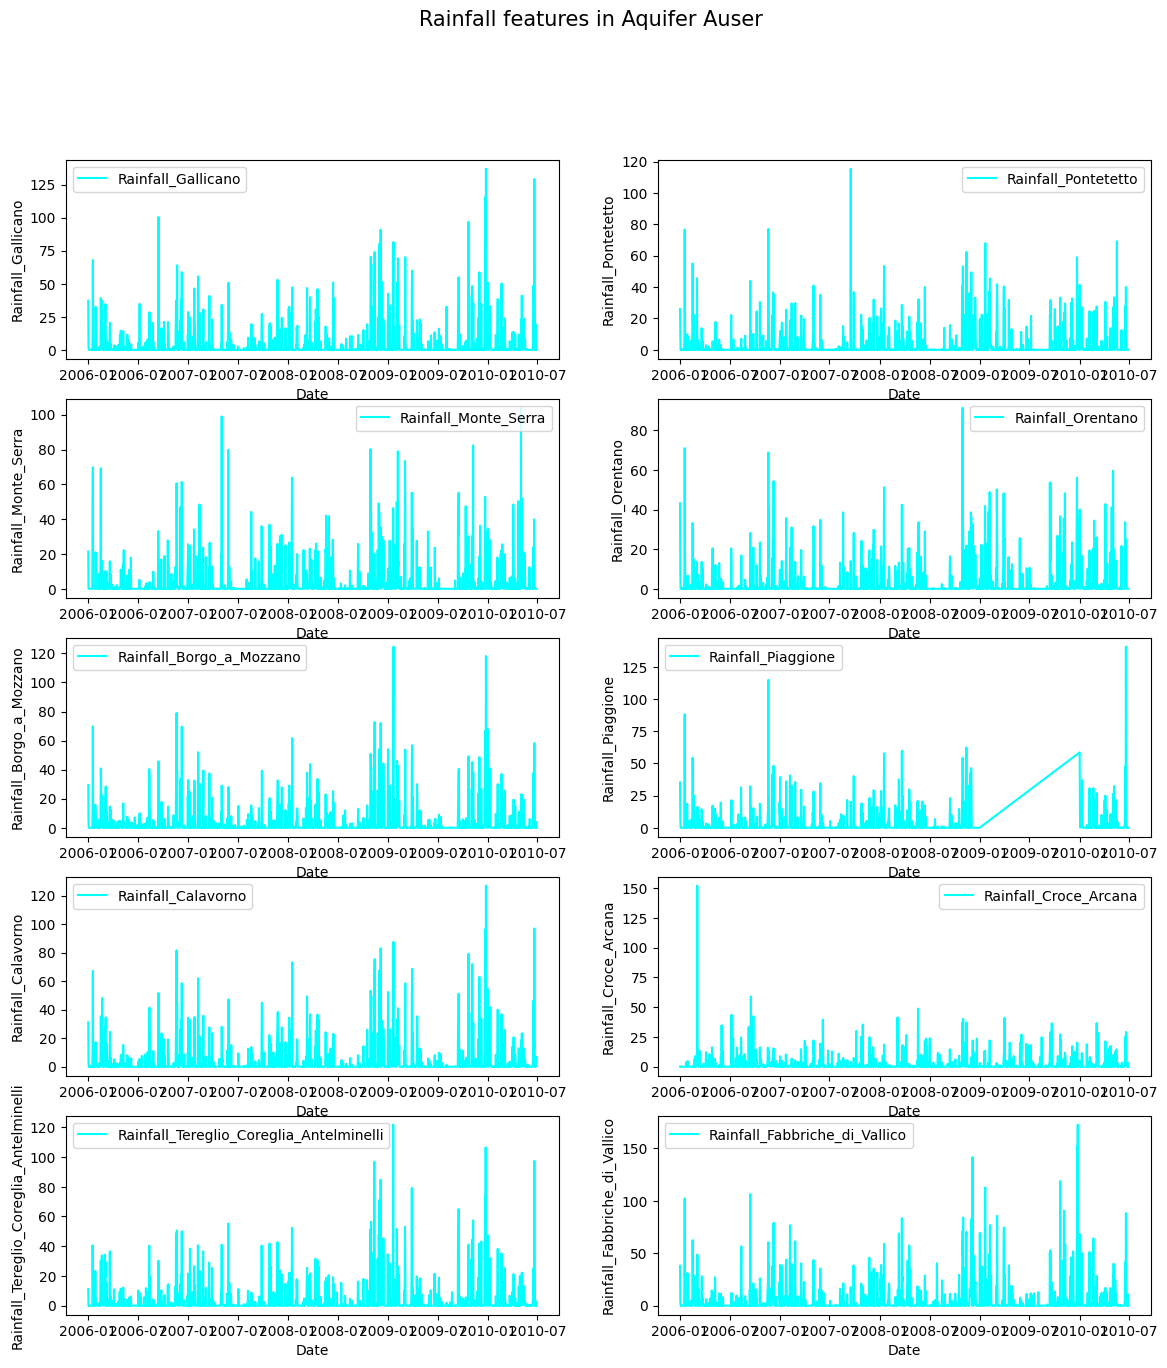

In [55]:
# Create subplots for all rainfall features in Aquifer Auser
fig, axes = plt.subplots(5, 2, figsize = (14,15))
fig.suptitle('Rainfall features in Aquifer Auser',fontsize=15)

#Plot graph for each rainfall feature with date
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Gallicano'].replace({np.nan : np.inf}),
    label='Rainfall_Gallicano',color='aqua',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Pontetetto'].replace({np.nan : np.inf}),
                label='Rainfall_Pontetetto',color='aqua',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Monte_Serra'].replace({np.nan : np.inf}),
    label='Rainfall_Monte_Serra',color='aqua',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Orentano'].replace({np.nan : np.inf}),
                label='Rainfall_Orentano',color='aqua',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Borgo_a_Mozzano'].replace({np.nan : np.inf}),
    label='Rainfall_Borgo_a_Mozzano',color='aqua',ax=axes[2][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Piaggione'].replace({np.nan : np.inf}),
                label='Rainfall_Piaggione',color='aqua',ax=axes[2][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Calavorno'].replace({np.nan : np.inf}),
    label='Rainfall_Calavorno',color='aqua',ax=axes[3][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Croce_Arcana'].replace({np.nan : np.inf}),
                label='Rainfall_Croce_Arcana',color='aqua',ax=axes[3][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Tereglio_Coreglia_Antelminelli'].replace({np.nan : np.inf}),
    label='Rainfall_Tereglio_Coreglia_Antelminelli',color='aqua',ax=axes[4][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Fabbriche_di_Vallico'].replace({np.nan : np.inf}),
                label='Rainfall_Fabbriche_di_Vallico',color='aqua',ax=axes[4][1])
plt.show()

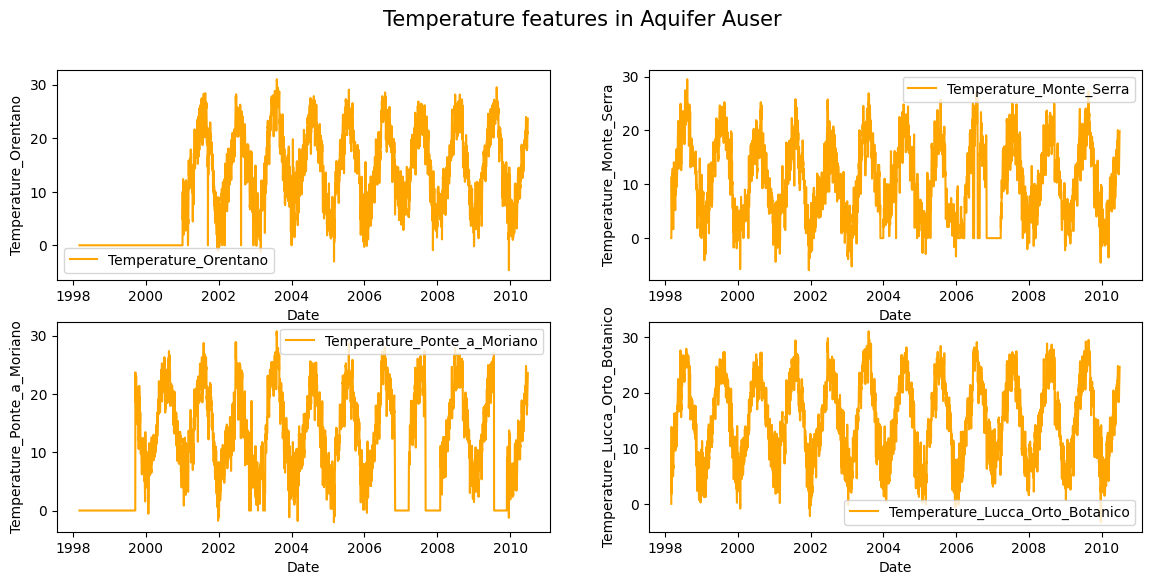

In [56]:
# Create subplots for all temperature features in Aquifer Auser
fig, axes = plt.subplots(2, 2, figsize = (14,6))
fig.suptitle('Temperature features in Aquifer Auser',fontsize=15)

#Plot graph for each temperature feature with date
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Temperature_Orentano'].replace({np.nan : np.inf}),
    label='Temperature_Orentano',color='orange',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Temperature_Monte_Serra'].replace({np.nan : np.inf}),
                label='Temperature_Monte_Serra',color='orange',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Temperature_Ponte_a_Moriano'].replace({np.nan : np.inf}),
    label='Temperature_Ponte_a_Moriano',color='orange',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Temperature_Lucca_Orto_Botanico'].replace({np.nan : np.inf}),
                label='Temperature_Lucca_Orto_Botanico',color='orange',ax=axes[1][1])

plt.show()

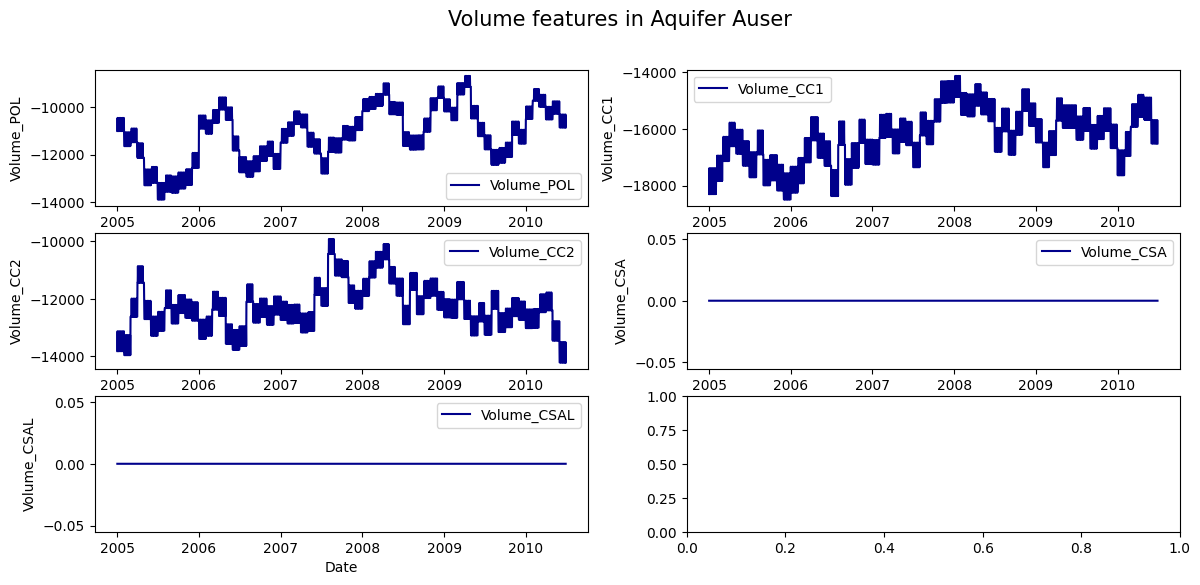

In [57]:
# Create subplots for all temperature features in Aquifer Auser
fig, axes = plt.subplots(3, 2, figsize = (14,6))
fig.suptitle('Volume features in Aquifer Auser',fontsize=15)

#Plot graph for each temperature feature with date
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_POL'].replace({np.nan : np.inf}),
    label='Volume_POL',color='darkblue',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_CC1'].replace({np.nan : np.inf}),
                label='Volume_CC1',color='darkblue',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_CC2'].replace({np.nan : np.inf}),
    label='Volume_CC2',color='darkblue',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_CSA'].replace({np.nan : np.inf}),
                label='Volume_CSA',color='darkblue',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_CSAL'].replace({np.nan : np.inf}),
                label='Volume_CSAL',color='darkblue',ax=axes[2][0])

plt.show()

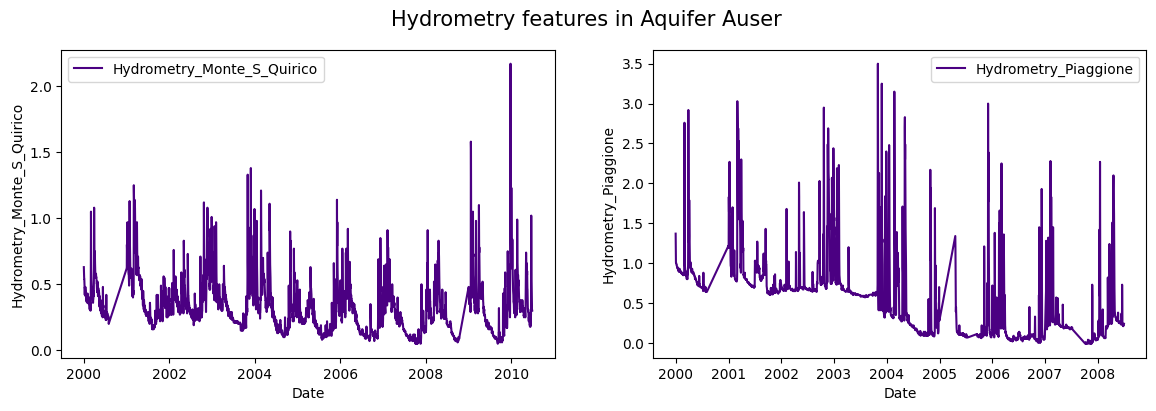

In [58]:
# Create subplots for all hydrometry features in Aquifer Auser
fig, axes = plt.subplots(1, 2, figsize = (14,4))
fig.suptitle('Hydrometry features in Aquifer Auser',fontsize=15)

#Plot graph for each hydrometry features with date
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Hydrometry_Monte_S_Quirico'].replace({np.nan : np.inf}),
    label='Hydrometry_Monte_S_Quirico',color='indigo',ax=axes[0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Hydrometry_Piaggione'].replace({np.nan : np.inf}),
                label='Hydrometry_Piaggione',color='indigo',ax=axes[1])
plt.show()

In [59]:
# Aquifer Auser

#copy the original dataset into a new variable
aquifer_auser_yearly = aquifer_auser.copy()

# extract years from the Date column and store as a new column
aquifer_auser_yearly['Year'] = pd.to_datetime(aquifer_auser_yearly['Date']).dt.year.values

# take the mean of groups of yearly values
aquifer_auser_yearly = aquifer_auser_yearly.groupby('Year').mean()

#take mean of rainfall features per year
aquifer_auser_yearly['mean_rainfall'] = aquifer_auser_yearly[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico']].mean(axis=1)

#take mean of temperature features per year
aquifer_auser_yearly['mean_temp'] = aquifer_auser_yearly[['Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico']].mean(axis=1)

#take mean of volume features per year
aquifer_auser_yearly['mean_volume'] = aquifer_auser_yearly[['Volume_POL', 'Volume_CC1', 'Volume_CC2',
                                                            'Volume_CSA', 'Volume_CSAL']].mean(axis=1)

#take mean of hydrometry features per year
aquifer_auser_yearly['mean_hydrometry'] = aquifer_auser_yearly[['Hydrometry_Monte_S_Quirico',
                                                                'Hydrometry_Piaggione']].mean(axis=1)

#take mean of depth to groundwater features per year
aquifer_auser_yearly['mean_depth_gwater'] = aquifer_auser_yearly[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']].mean(axis=1)

# reset the index to get the year as a column
aquifer_auser_yearly = aquifer_auser_yearly.reset_index()

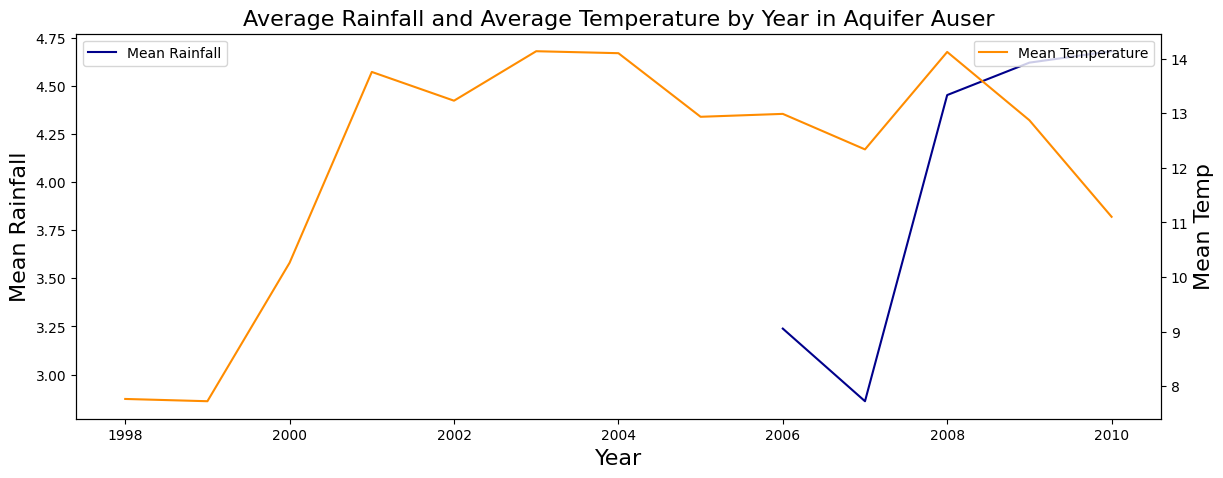

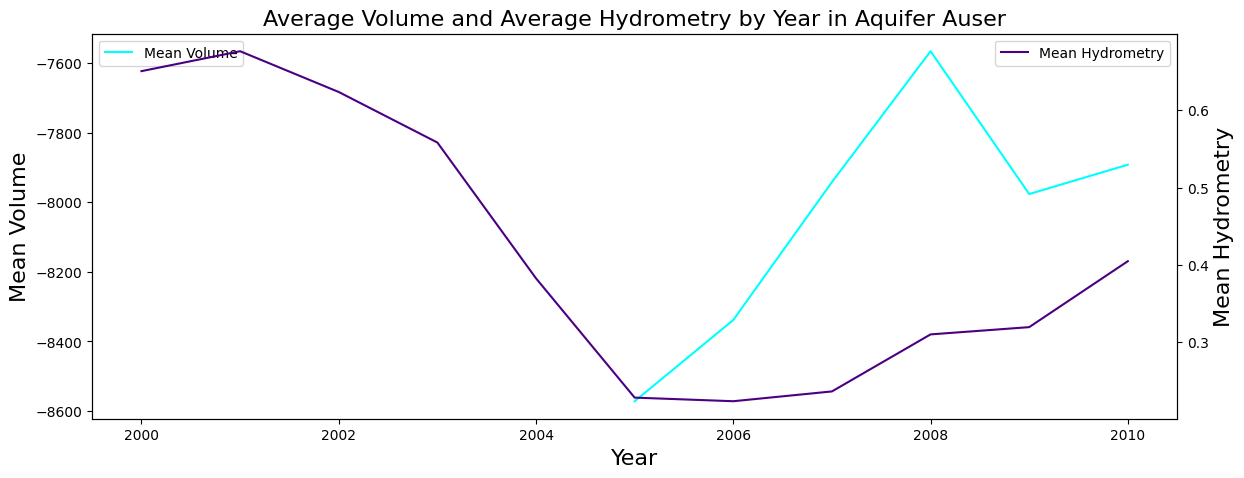

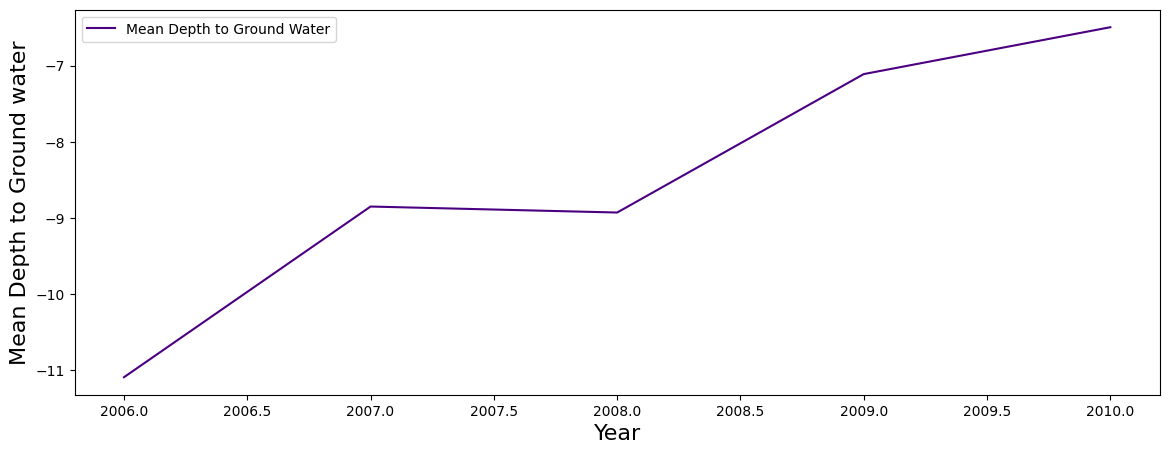

In [60]:
# Plot the rainfall, temperature graph

fig, ax1 = plt.subplots(figsize=(14,5))

#line plot with dual y axis for rainfall, temperature and x axis for year
ax1.set_title('Average Rainfall and Average Temperature by Year in Aquifer Auser', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = aquifer_auser_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = aquifer_auser_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


# Plot the volume, hydrometry graph
fig, ax1 = plt.subplots(figsize=(14,5))
#line plot with dual y axis for volume, hydrometry and x axis for year
ax1.set_title('Average Volume and Average Hydrometry by Year in Aquifer Auser', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_volume', data = aquifer_auser_yearly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Hydrometry', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_hydrometry', data = aquifer_auser_yearly, color='indigo',label='Mean Hydrometry')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


# Plot the depth to ground water as separate graph
plt.figure(figsize=(14,5))
sns.lineplot(x='Year', y='mean_depth_gwater', data = aquifer_auser_yearly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()

In [61]:
# Aquifer Auser monthly

#copy the original dataset into a new variable
aquifer_auser_monthly = aquifer_auser.copy()

# extract month from the Date column and store as a new column
aquifer_auser_monthly['Month'] = pd.to_datetime(aquifer_auser_monthly['Date']).dt.month.values

# take the mean of groups of monthly values
aquifer_auser_monthly = aquifer_auser_monthly.groupby('Month').mean()

#take mean of rainfall features per month
aquifer_auser_monthly['mean_rainfall'] = aquifer_auser_monthly[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico']].mean(axis=1)

#take mean of temperature features per month
aquifer_auser_monthly['mean_temp'] = aquifer_auser_monthly[['Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',]].mean(axis=1)
aquifer_auser_monthly['mean_volume'] = aquifer_auser_monthly[['Volume_POL', 'Volume_CC1', 'Volume_CC2',
                                                            'Volume_CSA', 'Volume_CSAL']].mean(axis=1)

#take mean of hydrometry features per month
aquifer_auser_monthly['mean_hydrometry'] = aquifer_auser_monthly[['Hydrometry_Monte_S_Quirico',
                                                                'Hydrometry_Piaggione']].mean(axis=1)

#take mean of depth to groundwater features per month
aquifer_auser_monthly['mean_depth_gwater'] = aquifer_auser_monthly[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']].mean(axis=1)

# reset the index to get the month as a column
aquifer_auser_monthly = aquifer_auser_monthly.reset_index()

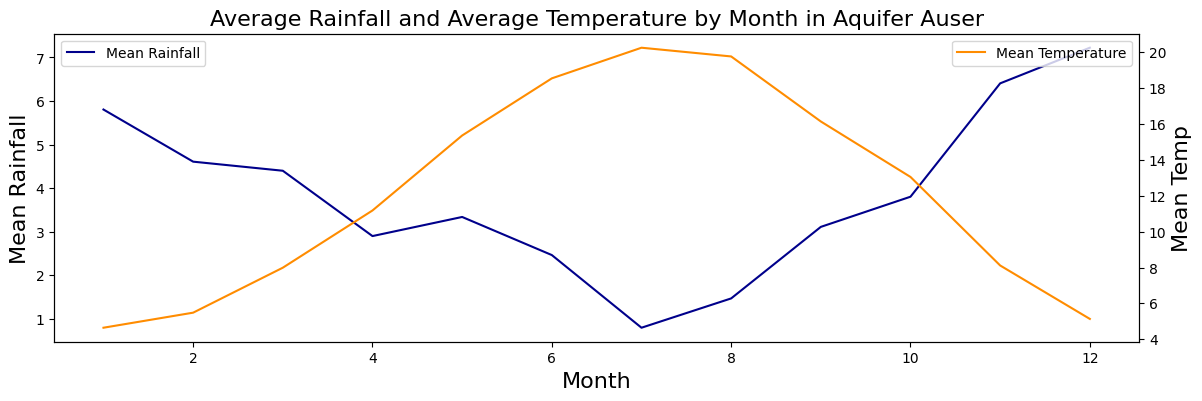

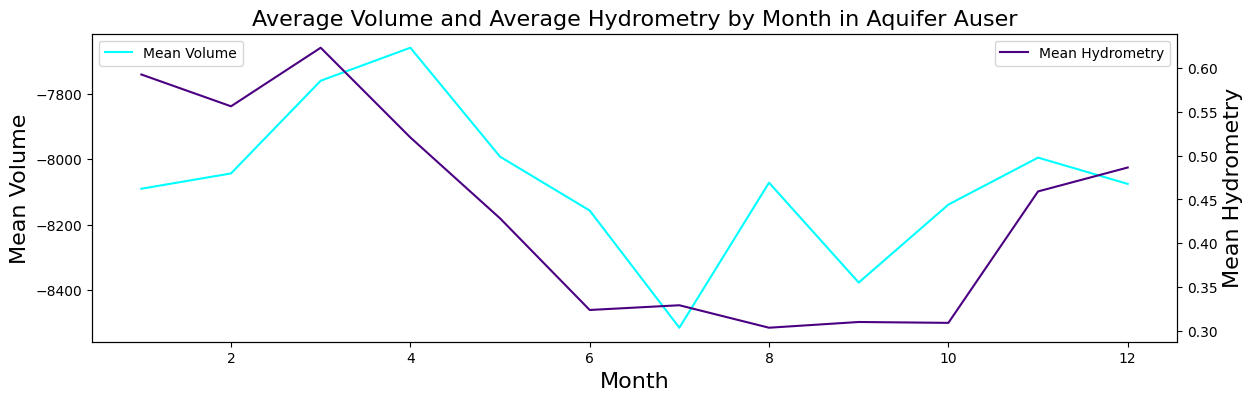

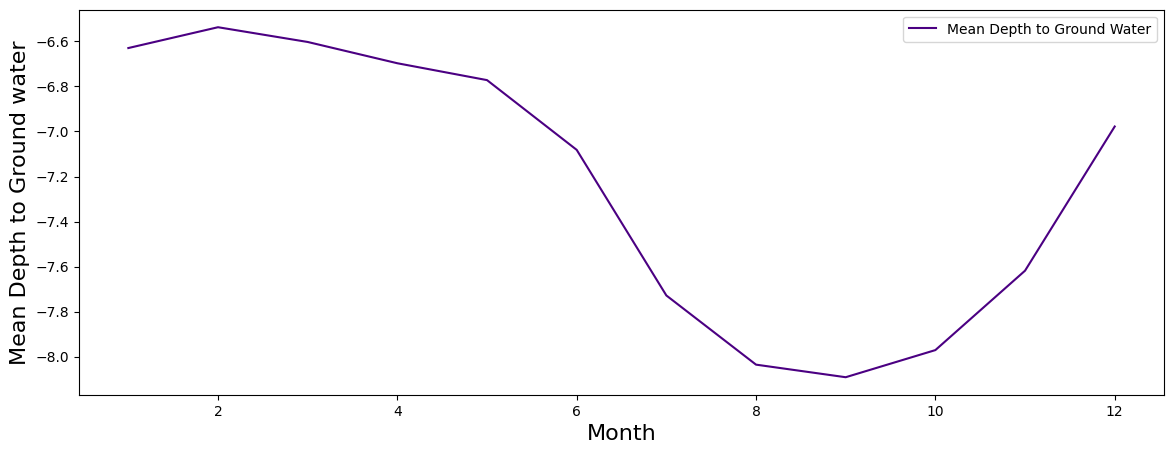

In [62]:
# Plot the rainfall, temperature graph
fig, ax1 = plt.subplots(figsize=(14,4))

#line plot with dual y axis for rainfall, temperature and x axis for month
ax1.set_title('Average Rainfall and Average Temperature by Month in Aquifer Auser', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = aquifer_auser_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = aquifer_auser_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


# Plot the volume, hydrometry graph
fig, ax1 = plt.subplots(figsize=(14,4))

#line plot with dual y axis for volume, hydrometry and x axis for year
ax1.set_title('Average Volume and Average Hydrometry by Month in Aquifer Auser', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_volume', data = aquifer_auser_monthly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Hydrometry', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_hydrometry', data = aquifer_auser_monthly, color='indigo',label='Mean Hydrometry')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

# Plot the depth to ground water as separate graph
plt.figure(figsize=(14,5))
sns.lineplot(x='Month', y='mean_depth_gwater', data = aquifer_auser_monthly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()